In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as colors

pi = np.pi

In [2]:
L = 1.5
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')




In [3]:
def x_y_dot(r, theta, r_dot, theta_dot):
    x_dot = r_dot(r, theta) * np.cos(theta) - r * np.sin(theta) * theta_dot(r, theta)
    y_dot = r_dot(r, theta) * np.sin(theta) + r * np.cos(theta) * theta_dot(r, theta)
    return x_dot, y_dot


def r_dot_cycle(r, theta):
    return r*(1 - r**2)

def theta_dot_cycle(r, theta):
    return 1.

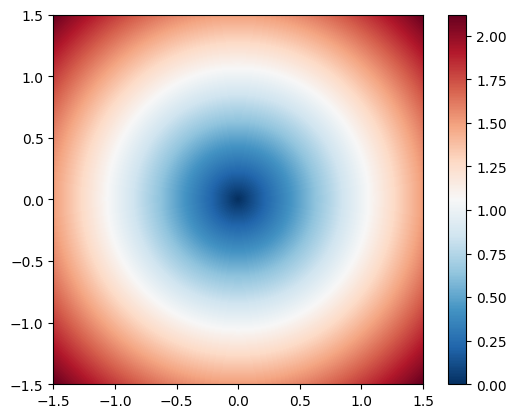

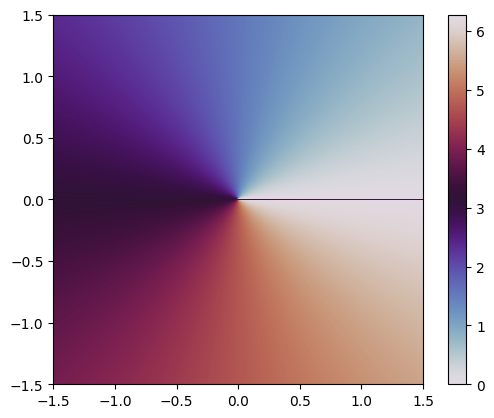

In [4]:

rr = np.sqrt(xx**2 + yy**2)
theta = (np.arctan2(yy, xx) + 2*np.pi)  % (2*np.pi)

plt.imshow(rr, cmap='RdBu_r', extent=[-L, L, -L, L], origin='lower')
plt.colorbar()
plt.show()

plt.imshow(theta, cmap='twilight', extent=[-L, L, -L, L], origin='lower')
plt.colorbar()
plt.show()

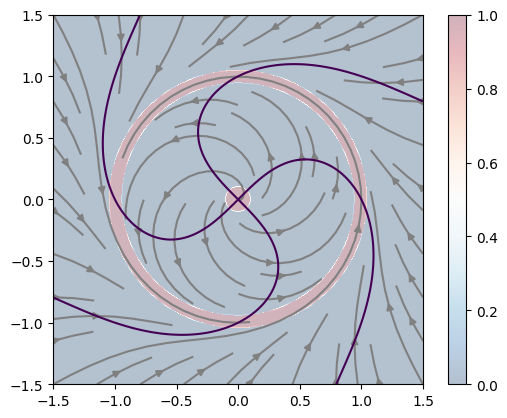

In [5]:


x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_cycle)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_cycle(rr, theta))<1e-1, cmap='RdBu_r', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.colorbar()
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_69617/2294712752.py:5: RuntimeWarning: invalid value encountered in divide
  return  -1.* np.sin(theta) / r


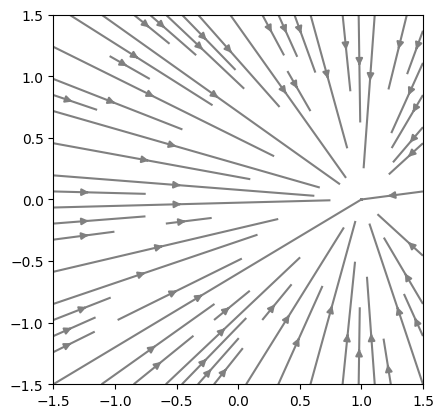

In [6]:
def r_dot_fp(r, theta):
    return -r + 1. *np.cos(theta)

def theta_dot_fp(r, theta):
    return  -1.* np.sin(theta) / r

plt.streamplot(xx, yy, *x_y_dot(rr, theta, r_dot_fp, theta_dot_fp), color='grey', density=.8)
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

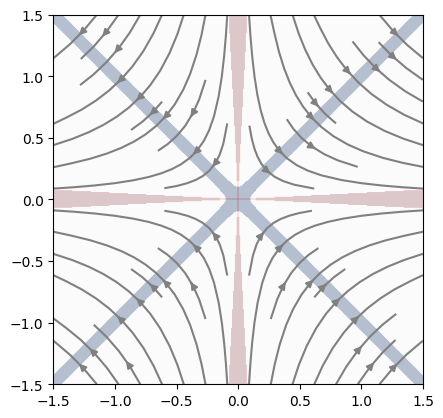

In [7]:
def r_dot_saddle(r, theta):
    return r*np.cos(2*theta)

def theta_dot_saddle(r, theta):
    return  -np.sin(2*theta)

plt.streamplot(xx, yy, *x_y_dot(rr, theta, r_dot_saddle, theta_dot_saddle), color='grey', density=.6)
plt.imshow(np.abs(theta_dot_saddle(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(r_dot_saddle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.set_aspect('equal')
plt.show()

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_69617/139250053.py:8: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)


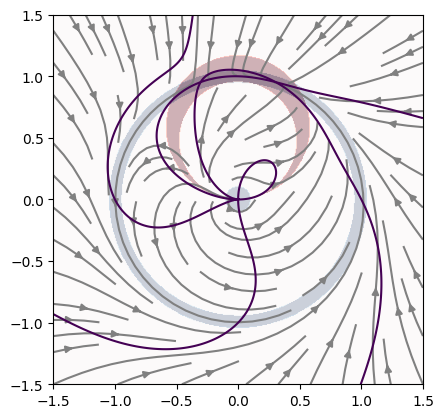

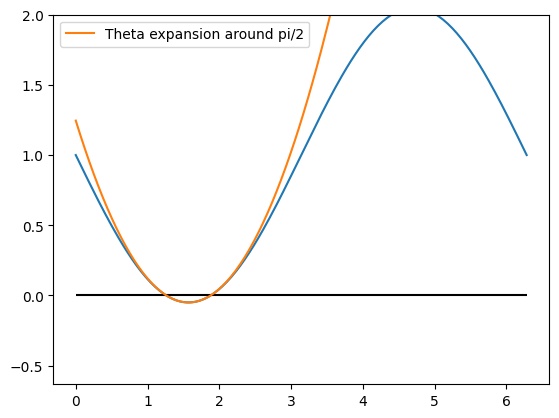

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_69617/139250053.py:37: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)


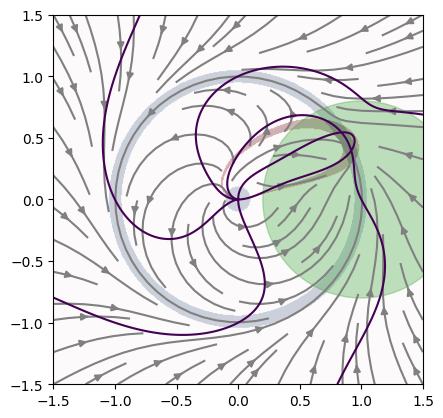

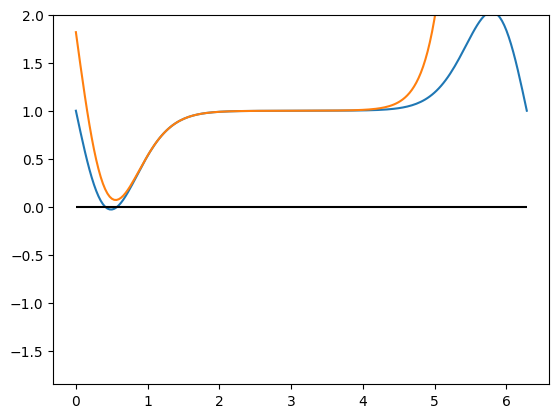

In [8]:
def theta_dot_snic(r, theta):
    a3 = 1.05  
    s3 = 100
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_cycle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.set_aspect('equal')
plt.show()

th = np.linspace(0, 2*np.pi, 201)
plt.plot(th, theta_dot_snic(1, th))
plt.hlines(0, th[0], th[-1], color='k')
plt.plot(th, 1.05 * ( (1/1.05 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
plt.ylim(top=2.)
plt.legend()
plt.show()


def theta_dot_snic(r, theta):
    a3 = 3.5
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_cycle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.add_patch(plt.Circle((1., 0), radius=0.8, alpha=0.3, color='tab:green'))

ax.set_aspect('equal')
plt.show()

th = np.linspace(0, 2*np.pi, 201)
plt.plot(th, theta_dot_snic(1, th))
x = np.cos(th)
y = np.sin(th)
r0 = np.sqrt((x-1.)**2 + y**2)
exp3 = np.exp(-r0**2/2./0.5**2)
plt.plot(th, 3.5 *exp3 * ( (1/3.5/ exp3 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
# plt.plot(th, 1 - np.sin(theta)/r * 1.0 * exp3)
plt.hlines(0, th[0], th[-1], color='k')
plt.ylim(top=2.)

plt.show()


/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_69617/3869568092.py:22: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * exp


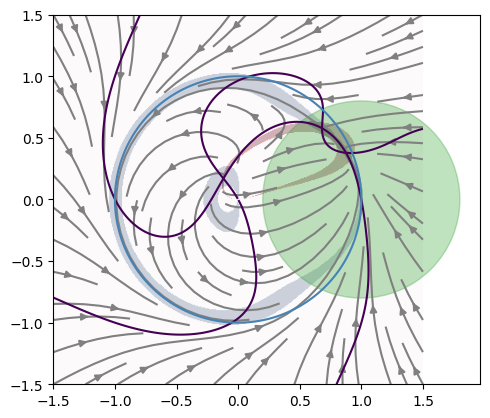

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_69617/3869568092.py:84: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * exp


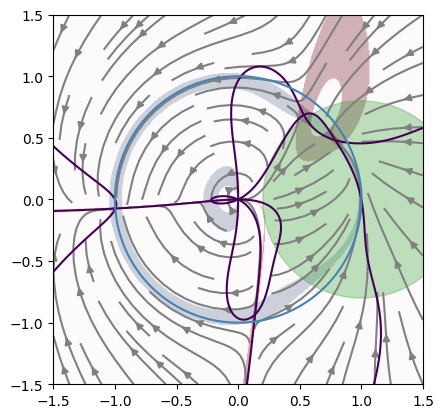

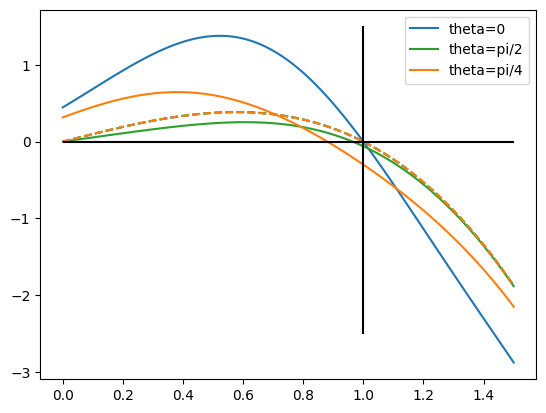

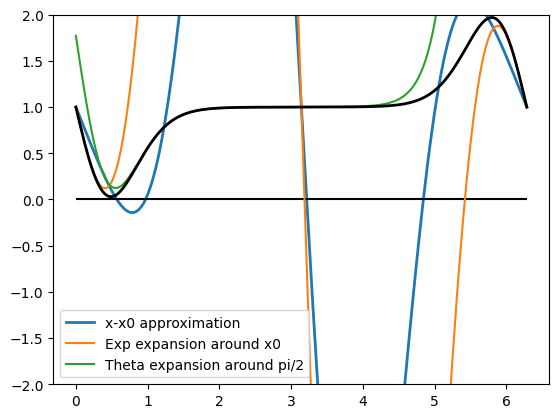

In [64]:
def r_dot_snic(r, theta):
    a3 = 3.3
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    exp = np.exp(-r0**2/2./s3**2)
    # exp = 1. -r0**2/2./s3**2
    return r_dot_cycle(r, theta) + (-r + x0*np.cos(theta)) * a3 * exp


def theta_dot_snic(r, theta):
    a3 = 3.3
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    exp = np.exp(-r0**2/2./s3**2)
    # exp = 1. -r0**2/2./s3**2
    return 1 - x0*np.sin(theta)/r * a3 * exp

x_dot, y_dot = x_y_dot(rr, theta, r_dot_snic, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_snic(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.contour(xx, yy, rr, levels=(1,), colors='steelblue')


ax=plt.gca()
ax.add_patch(plt.Circle((1., 0), radius=0.8, alpha=0.3, color='tab:green'))
ax.set_aspect('equal')
plt.show()


# def theta_dot_snic(r, theta):
#     a3 = 3.
#     s3 = 0.5
#     x0 = 1.
#     x = r*np.cos(theta)
#     y = r*np.sin(theta)
#     r0 = np.sqrt((x-x0)**2 + y**2)
#     # exp = np.exp(-r0**2/2./s3**2)
#     exp = 1/(1. + r0**2/2/s3**2)
#     return 1 - x0*np.sin(theta)/r * a3 * exp
# 
# x_dot, y_dot = x_y_dot(rr, theta, r_dot_snic, theta_dot_snic)
# plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
# plt.contour(xx, yy, x_dot, levels=(0,))
# plt.contour(xx, yy, y_dot, levels=(0,))
# plt.imshow(np.abs(r_dot_snic(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
# plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
# 
# ax=plt.gca()
# ax.add_patch(plt.Circle((1., 0), radius=0.8, alpha=0.3, color='tab:green'))
# ax.set_aspect('equal')
# plt.show()

def r_dot_snic(r, theta):
    a3 = 3.3
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    exp = np.exp(-r0**2/2./s3**2)
    # exp = 1. -r0**2/2./s3**2
    # exp = 1 -(x-x0)**2/2./s3**2
    return r_dot_cycle(r, theta) + (-r + x0*np.cos(theta)) * a3 * exp

def theta_dot_snic(r, theta):
    a3 = 1.95
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    # exp = np.exp(-r0**2/2./s3**2)
    exp = np.exp(-(x-x0)**2/2./s3**2)
    exp = 1 -(x-x0)**2/2./s3**2
    return 1 - x0*np.sin(theta)/r * a3 * exp

x_dot, y_dot = x_y_dot(rr, theta, r_dot_snic, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_snic(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.contour(xx, yy, rr, levels=(1,), colors='steelblue')
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.add_patch(plt.Circle((1., 0), radius=0.8, alpha=0.3, color='tab:green'))
ax.set_aspect('equal')
plt.show()

r = np.linspace(0, 1.5, 101)
plt.plot(r, r_dot_snic(r, 0), c='tab:blue', label='theta=0')
plt.plot(r, r_dot_cycle(r, 0.), '--', c='tab:blue')
plt.plot(r, r_dot_snic(r, pi/2), c='tab:green', label='theta=pi/2')
plt.plot(r, r_dot_cycle(r, pi/2), '--', c='tab:green')
plt.plot(r, r_dot_snic(r, pi/4), c='tab:orange', label='theta=pi/4')
plt.plot(r, r_dot_cycle(r, pi/4), '--', c='tab:orange')
plt.vlines(1, -2.5, 1.5, color='k')
plt.hlines(0, 0., 1.5, color='k')
plt.legend()
plt.show()

plt.plot(th, theta_dot_snic(1, th), lw=2, label='x-x0 approximation')
plt.hlines(0, th[0], th[-1], color='k')
eta = 1/ 2/0.5**2 
x0 = 1.
f_th = 3.3 * np.sin(th) * (1 - (1+x0**2)*eta + np.cos(th)*2*eta)
plt.plot(th, 1. - f_th, label='Exp expansion around x0')

x = np.cos(th)
y = np.sin(th)
r0 = np.sqrt((x-1.)**2 + y**2)
exp3 = np.exp(-r0**2/2./0.5**2)
plt.plot(th, 3.3 *exp3 * ( (1/3.3/ exp3 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
plt.ylim((-2, 2))

# R = 1.1
# plt.plot(th, 1 - np.sin(th)/R/(1 - np.cos(th)/R) * r_dot_cycle(R, th)/R, label='R=0.9')
# # plt.plot(th, theta_dot_snic(0.9, th), label='R=0.9')
# plt.legend()

def theta_dot_snic(r, theta):
    a3 = 3.3
    s3 = 0.5
    x0 = 1.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    exp = np.exp(-r0**2/2./s3**2)
    # exp = 1. -r0**2/2./s3**2
    return 1 - x0*np.sin(theta)/r * a3 * exp

plt.plot(th, theta_dot_snic(1, th), lw=2, c='k')
plt.legend()
plt.show()

(0.0, 1.3996719262641912)

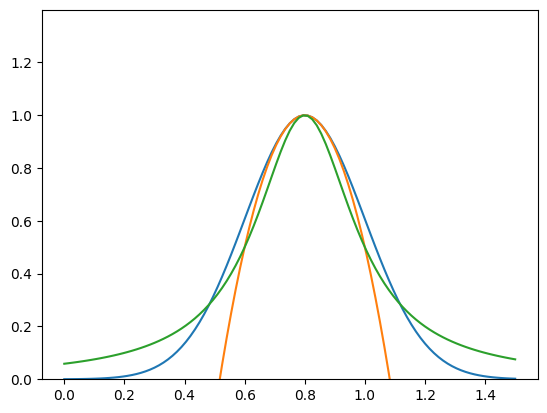

In [30]:
plt.plot(r, np.exp(-(r-0.8)**2/2/0.2**2))
plt.plot(r, 1-(r-0.8)**2/2/0.2**2)
plt.plot(r, 1./(1. + (r-0.8)**2/0.2**2))
plt.ylim(bottom=0)

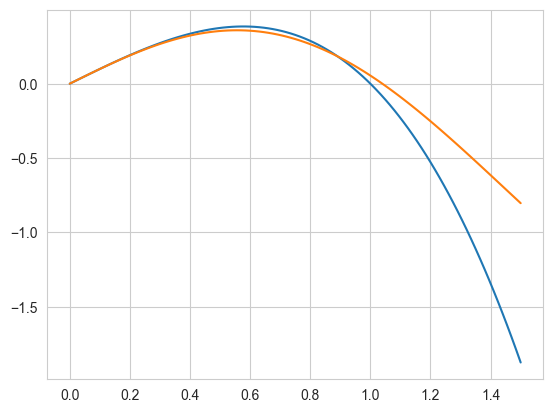

In [144]:
r = np.linspace(0, 1.5, 101)
plt.plot(r, r_dot_cycle(r, 0.))
a1 = 2
a2 = 3
s1 = 2.
s2 = 1
plt.plot(r, -r*( a1*np.exp(-r**2/2/s1**2) - a2*np.exp(-r**2/2/s2**2 )))
plt.show()

In [222]:
L = 2.5
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')


rr = np.sqrt(xx**2 + yy**2)
theta = (np.arctan2(yy, xx) + 2*np.pi)  % (2*np.pi)

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_6968/2551179954.py:8: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)


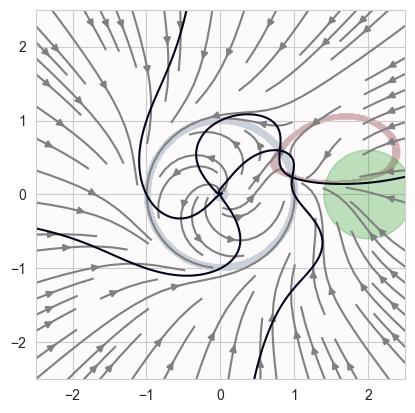

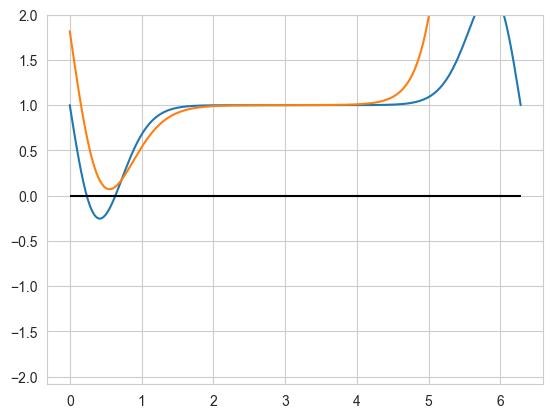

In [224]:
def theta_dot_snic(r, theta):
    a3 = 10.
    s3 = 0.6
    x0 = 2.
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_cycle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.add_patch(plt.Circle((2., 0), radius=0.6, alpha=0.3, color='tab:green'))

ax.set_aspect('equal')
plt.show()

th = np.linspace(0, 2*np.pi, 201)
plt.plot(th, theta_dot_snic(1, th))
x = np.cos(th)
y = np.sin(th)
r0 = np.sqrt((x-1.)**2 + y**2)
exp3 = np.exp(-r0**2/2./0.5**2)
plt.plot(th, 3.5 *exp3 * ( (1/3.5/ exp3 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
# plt.plot(th, 1 - np.sin(theta)/r * 1.0 * exp3)
plt.hlines(0, th[0], th[-1], color='k')
plt.ylim(top=2.)

plt.show()


/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_6968/2202679894.py:8: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)


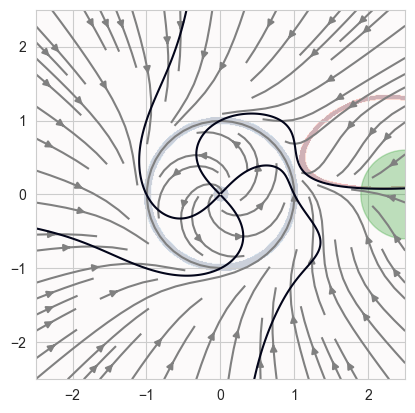

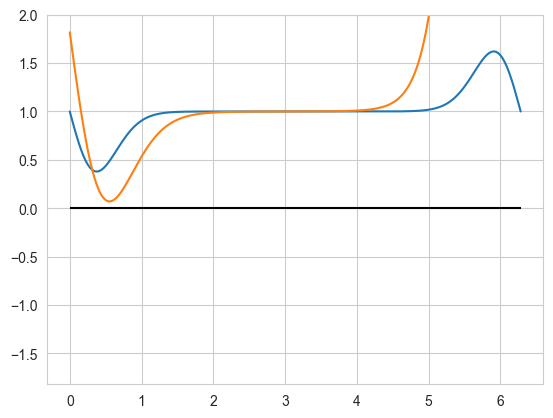

In [228]:
def theta_dot_snic(r, theta):
    a3 = 25.
    s3 = 0.6
    x0 = 2.5
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_cycle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.add_patch(plt.Circle((2.5, 0), radius=0.6, alpha=0.3, color='tab:green'))

ax.set_aspect('equal')
plt.show()

th = np.linspace(0, 2*np.pi, 201)
plt.plot(th, theta_dot_snic(1, th))
x = np.cos(th)
y = np.sin(th)
r0 = np.sqrt((x-1.)**2 + y**2)
exp3 = np.exp(-r0**2/2./0.5**2)
plt.plot(th, 3.5 *exp3 * ( (1/3.5/ exp3 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
# plt.plot(th, 1 - np.sin(theta)/r * 1.0 * exp3)
plt.hlines(0, th[0], th[-1], color='k')
plt.ylim(top=2.)

plt.show()


/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_6968/1054719618.py:18: RuntimeWarning: invalid value encountered in divide
  return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)


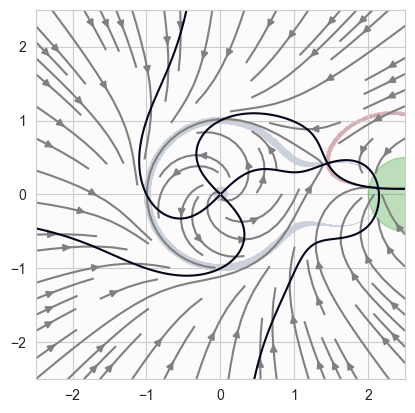

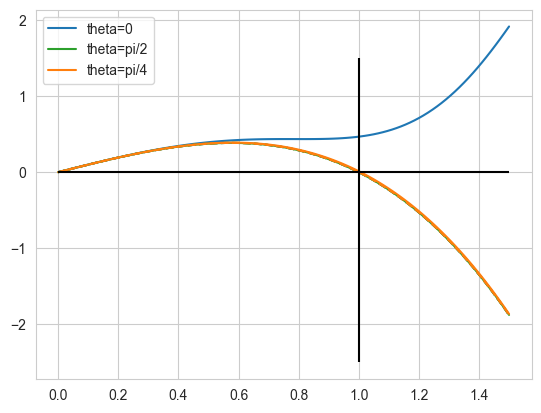

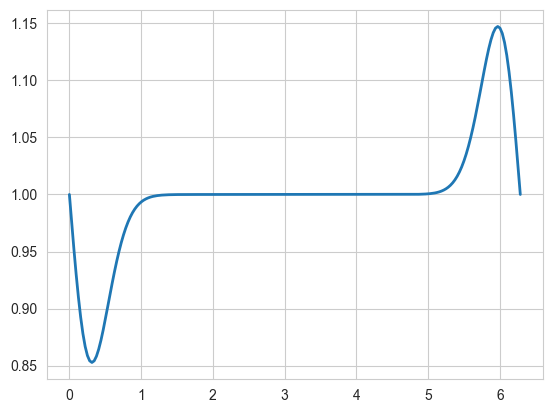

In [242]:
def r_dot_snic(r, theta):
    a3 = 28.
    s3 = 0.5
    x0 = 2.5
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return r_dot_cycle(r, theta) + (-r + x0*np.cos(theta)) * a3 * np.exp(-r0**2/2./s3**2)


def theta_dot_snic(r, theta):
    a3 = 28.
    s3 = 0.5
    x0 = 2.5
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return 1 - x0*np.sin(theta)/r * a3 * np.exp(-r0**2/2./s3**2)

x_dot, y_dot = x_y_dot(rr, theta, r_dot_snic, theta_dot_snic)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.8)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_snic(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(theta_dot_snic(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.add_patch(plt.Circle((2.5, 0), radius=0.5, alpha=0.3, color='tab:green'))
ax.set_aspect('equal')
plt.show()

r = np.linspace(0, 1.5, 101)
plt.plot(r, r_dot_snic(r, 0), c='tab:blue', label='theta=0')
plt.plot(r, r_dot_cycle(r, 0.), '--', c='tab:blue')
plt.plot(r, r_dot_snic(r, pi/2), c='tab:green', label='theta=pi/2')
plt.plot(r, r_dot_cycle(r, pi/2), '--', c='tab:green')
plt.plot(r, r_dot_snic(r, pi/4), c='tab:orange', label='theta=pi/4')
plt.plot(r, r_dot_cycle(r, pi/4), '--', c='tab:orange')
plt.vlines(1, -2.5, 1.5, color='k')
plt.hlines(0, 0., 1.5, color='k')
plt.legend()
plt.show()



plt.plot(th, theta_dot_snic(1, th), lw=2)
# plt.hlines(0, th[0], th[-1], color='k')
# eta = 1/ 2/0.5**2 
# x0 = 1.
# f_th = 3.3 * np.sin(th) * (1 - (1+x0**2)*eta + np.cos(th)*2*eta)
# plt.plot(th, 1. - f_th, label='Exp expansion around x0')
# 
# x = np.cos(th)
# y = np.sin(th)
# r0 = np.sqrt((x-1.)**2 + y**2)
# exp3 = np.exp(-r0**2/2./0.5**2)
# plt.plot(th, 3.3 *exp3 * ( (1/3.3/ exp3 - 1) + (th-np.pi/2)**2 / 2.), label='Theta expansion around pi/2')
# plt.ylim((-2, 2))
# 
# R = 0.9
# plt.plot(th, 1 - np.sin(th)/R/(1 - np.cos(th)/R) * r_dot_cycle(R, th)/R, label='R=0.9')
# # plt.plot(th, theta_dot_snic(0.9, th), label='R=0.9')
# plt.legend()

plt.show()